# Emmelies första test för resnet50
Utvecklingskod som ej används

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

!pip install torchmetrics
!torchinfo

In [2]:
# Path to your dataset
dataset_path = 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease'

# Lists to store file paths
healthy_fishes = []
sick_fishes = []

# Read folder names
folders = os.listdir(dataset_path)

# Iterate through folders
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    
    # Check if the folder name starts with "Healthy"
    if folder.startswith('Healthy'):
        # Append all files in the folder to healthy_fishes list
        healthy_fishes.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path)])
    else:
        # Append all files in the folder to sick_fishes list
        sick_fishes.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path)])

# Perform train-test split for healthy fishes
healthy_train, healthy_val = train_test_split(healthy_fishes, test_size=0.2, random_state=42)

# Perform train-test split for sick fishes
sick_train, sick_val = train_test_split(sick_fishes, test_size=0.2, random_state=42)


In [3]:
# Now, you can use these lists directly for training and validation
# For example, printing the first 5 file paths in each set:
print("Healthy Train Files:", healthy_train[:5])
print("Healthy Validation Files:", healthy_val[:5])
print("Sick Train Files:", sick_train[:5])
print("Sick Validation Files:", sick_val[:5])

Healthy Train Files: ['C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_55.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_81.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_41.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_68.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_24.jpeg']
Healthy Validation Files: ['C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_40.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Gills\\healthy_gills_10.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_12.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_Fish_118.jpg', 'C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease\\Healthy Fish\\Healthy_F

In [4]:
# Create DataFrames from the file paths
train_df = pd.DataFrame({
    'filepath': healthy_train + sick_train,
    'label': ['1'] * len(healthy_train) + ['0'] * len(sick_train)  # '1' for Healthy, '0' for Sick as strings
})

val_df = pd.DataFrame({
    'filepath': healthy_val + sick_val,
    'label': ['1'] * len(healthy_val) + ['0'] * len(sick_val)
})

# ImageDataGenerator with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Flow from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 337 validated image filenames belonging to 2 classes.
Found 84 validated image filenames belonging to 2 classes.


c:\Users\emmel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
c:\Users\emmel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(base_model.input, output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:


# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_true), y=y_true)

# Create a dictionary to be used in the fit method
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Example fit method
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight_dict
)

NameError: name 'y_true' is not defined

In [ ]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size
# )

Epoch 1/10


10/10 [==============================] - 18s 2s/step - loss: 4.5995 - accuracy: 0.5541 - val_loss: 0.6471 - val_accuracy: 0.6562
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 0.7765 - accuracy: 0.5049 - val_loss: 0.6754 - val_accuracy: 0.5938
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 0.6823 - accuracy: 0.4951 - val_loss: 0.6591 - val_accuracy: 0.6406
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.7072 - accuracy: 0.6295 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 0.6866 - accuracy: 0.6281 - val_loss: 0.6765 - val_accuracy: 0.6719
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: 0.6621 - accuracy: 0.6295 - val_loss: 0.6577 - val_accuracy: 0.6406
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 0.6796 - accuracy: 0.6361 - val_loss: 0.6601 - val_accuracy: 0.6250
Epoch 8/10
10/10 [

3/3 [==============================] - 4s 875ms/step


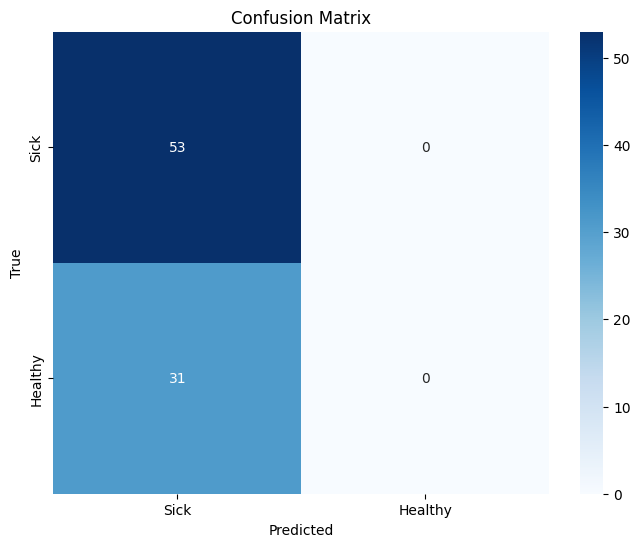

In [ ]:
y_true = validation_generator.classes
y_pred = (model.predict(validation_generator) > 0.5).astype(int)  # Convert probabilities to binary predictions

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Sick', 'Healthy'], yticklabels=['Sick', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 3s 926ms/step - loss: 0.6588 - accuracy: 0.6310


[0.6588329076766968, 0.6309523582458496]

In [ ]:
#model.save('fish_classifier_resnet50.h5')

In [ ]:
# Load the model
#model = load_model('fish_classifier_resnet50.h5')

# Load and preprocess a new image
img_path = 'path/to/your/image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Make predictions
predictions = model.predict(img_array)
print(predictions)